#  predict price of listings and provide the same as a recommendation to the host. 


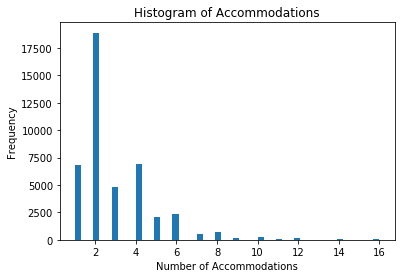

In [27]:
# visualize distribution of price 
plt.hist(data['accommodates'], bins=50)
plt.title("Histogram of Accommodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.show()

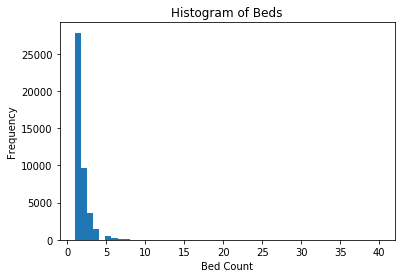

In [28]:
# visualize distribution of beds
plt.hist(data['beds'], bins=50)
plt.title("Histogram of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.show()

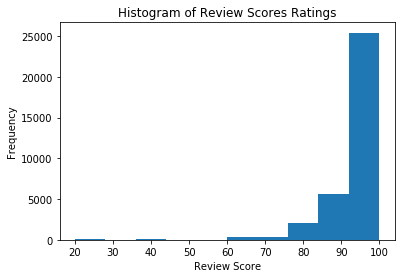

In [29]:
# visualize distribution of review scores ratings
plt.hist(data['review_scores_rating'][~data['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

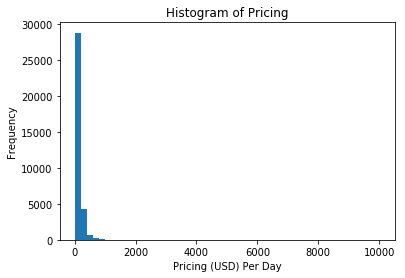

In [45]:
# visualize distribution of price 
plt.hist(df['price'], bins=50)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

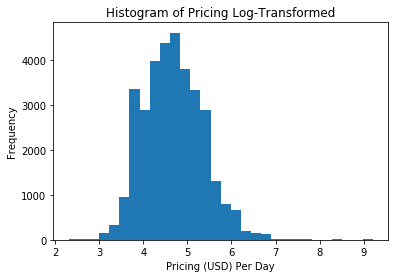

In [46]:
# log transform the response 'price'
df['price_log'] = df['price'].apply(lambda x: math.log(x))

# visualize distribution of price (target variable)
plt.hist(df['price_log'], bins=30)
plt.title("Histogram of Pricing Log-Transformed")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

### Freshness of Data for listings

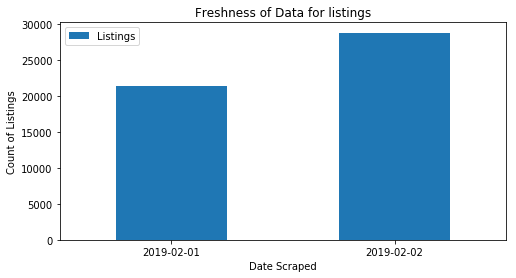

In [80]:
df_last = pd.DataFrame(df.last_scraped.value_counts()).reset_index().rename(columns={'index':'Date','last_scraped':'Listings'})

df_last.sort_values(by='Date', inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
df_last.plot(kind='bar', ax=ax)
ax.set_xticklabels(df_last['Date'], rotation='horizontal')
ax.set_xlabel('Date Scraped')
ax.set_ylabel('Count of Listings')
ax.set_title('Freshness of Data for listings')
Markdown('### Freshness of Data for listings')

### Visualize Listing Count by Host experience

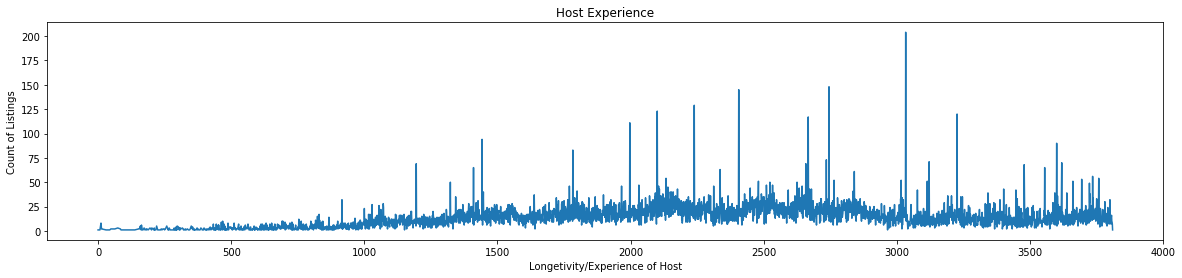

In [83]:
df['host_experience'] = (pd.to_datetime(df['host_since']) - min(pd.to_datetime(df['host_since']))).apply(lambda x: x.days)
df_last = pd.DataFrame(df.host_experience.value_counts()).reset_index().rename(columns={'index':'Longetivity', 'host_experience':'listings'})
df_last.sort_values(by='Longetivity', inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
ax.plot(df_last['Longetivity'],df_last['listings'])
ax.set_xlabel('Longetivity/Experience of Host')
ax.set_ylabel('Count of Listings')
ax.set_title('Host Experience')
Markdown('### Visualize Listing Count by Host experience')

### Neighbourhood Popularity

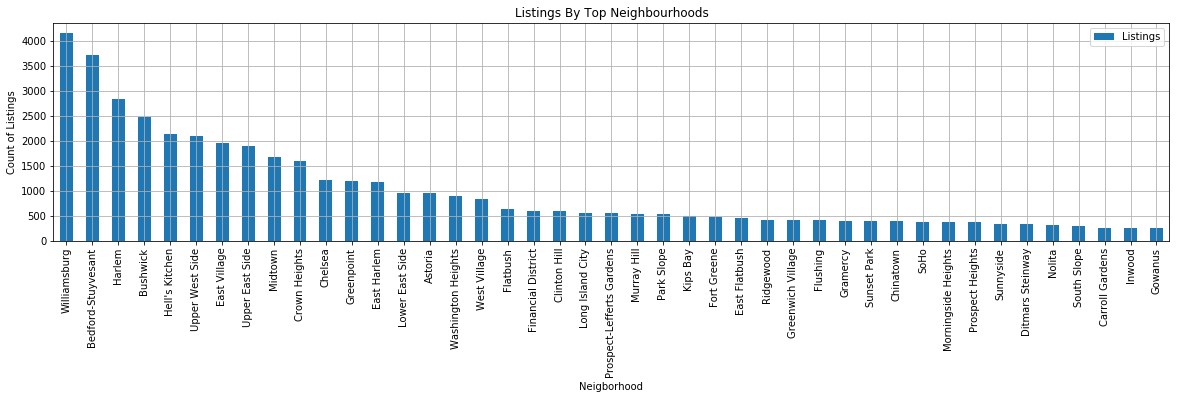

In [84]:
df_last = pd.DataFrame(df.neighbourhood_cleansed.value_counts()).reset_index().rename(columns={'index':'Neigbourhood','neighbourhood_cleansed':'Listings'})

df_last.sort_values(by='Listings', ascending=False, inplace=True)
df_last = df_last[df_last['Listings'] > 250]
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
df_last.plot(kind='bar', ax=ax)
ax.set_xticklabels(df_last['Neigbourhood'])
ax.set_xlabel('Neigborhood')
ax.set_ylabel('Count of Listings')
ax.set_title('Listings By Top Neighbourhoods')
ax.grid()
Markdown('### Neighbourhood Popularity')

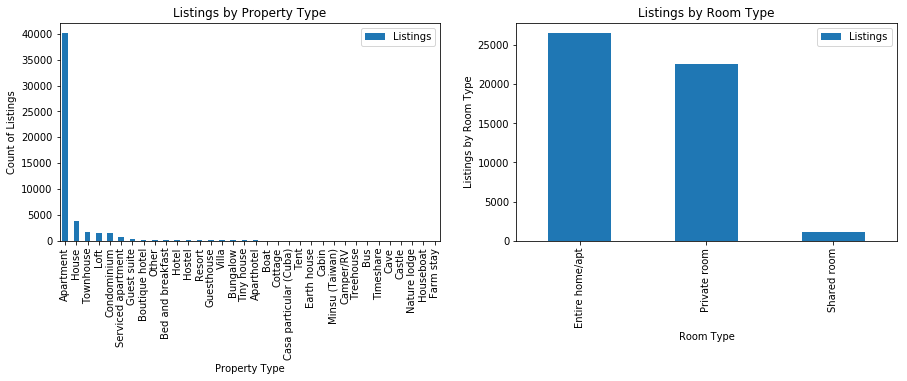

In [85]:
#property_type
df_last = pd.DataFrame(df.property_type.value_counts()).reset_index().rename(columns={'index':'property_type','property_type':'Listings'})

fig, (ax,ax1) = plt.subplots(1, 2, figsize=(15, 4))
df_last.plot(kind='bar', ax=ax)
ax.set_xticklabels(df_last['property_type'])
ax.set_xlabel('Property Type')
ax.set_ylabel('Count of Listings')
ax.set_title('Listings by Property Type')
Markdown('### Listings By Property / Room Type')

df_last = pd.DataFrame(df.room_type.value_counts()).reset_index().rename(columns={'index':'room_type','room_type':'Listings'})

df_last.plot(kind='bar', ax=ax1)
ax1.set_xticklabels(df_last['room_type'])
ax1.set_xlabel('Room Type')
ax1.set_ylabel('Listings by Room Type')
ax1.set_title('Listings by Room Type');

In [86]:
df['price'] = df['price'].replace('[\$,)]','',  \
        regex=True).replace('[(]','-', regex=True).astype(float)

In [87]:
reviews_column = ['price','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                  'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
                  'reviews_per_month']

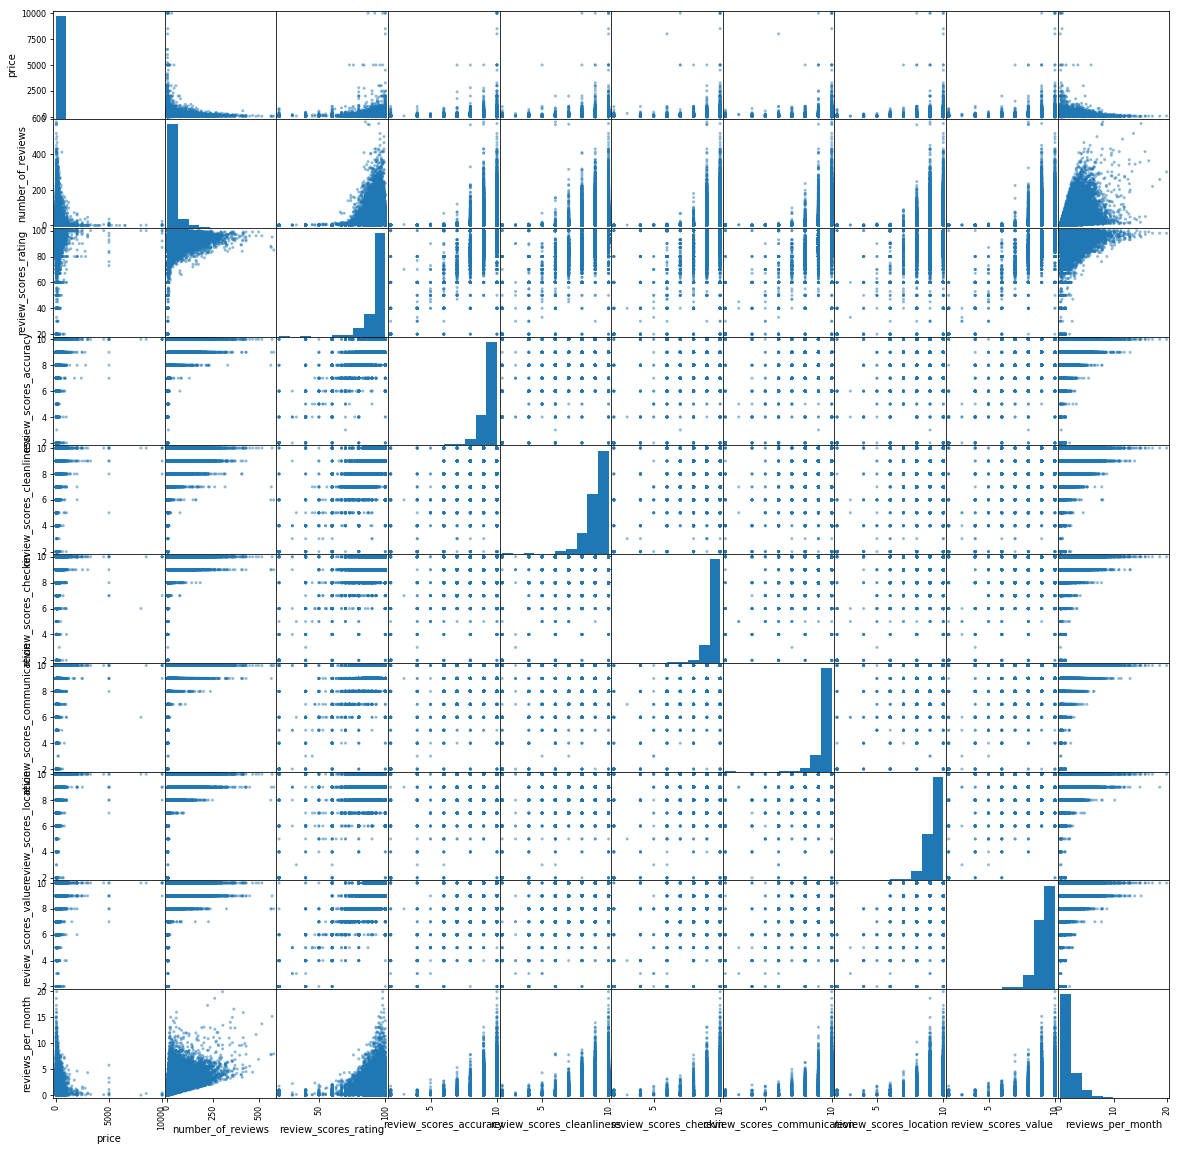

In [88]:
scatter_plots = pd.scatter_matrix(df[reviews_column],figsize=(20,20))

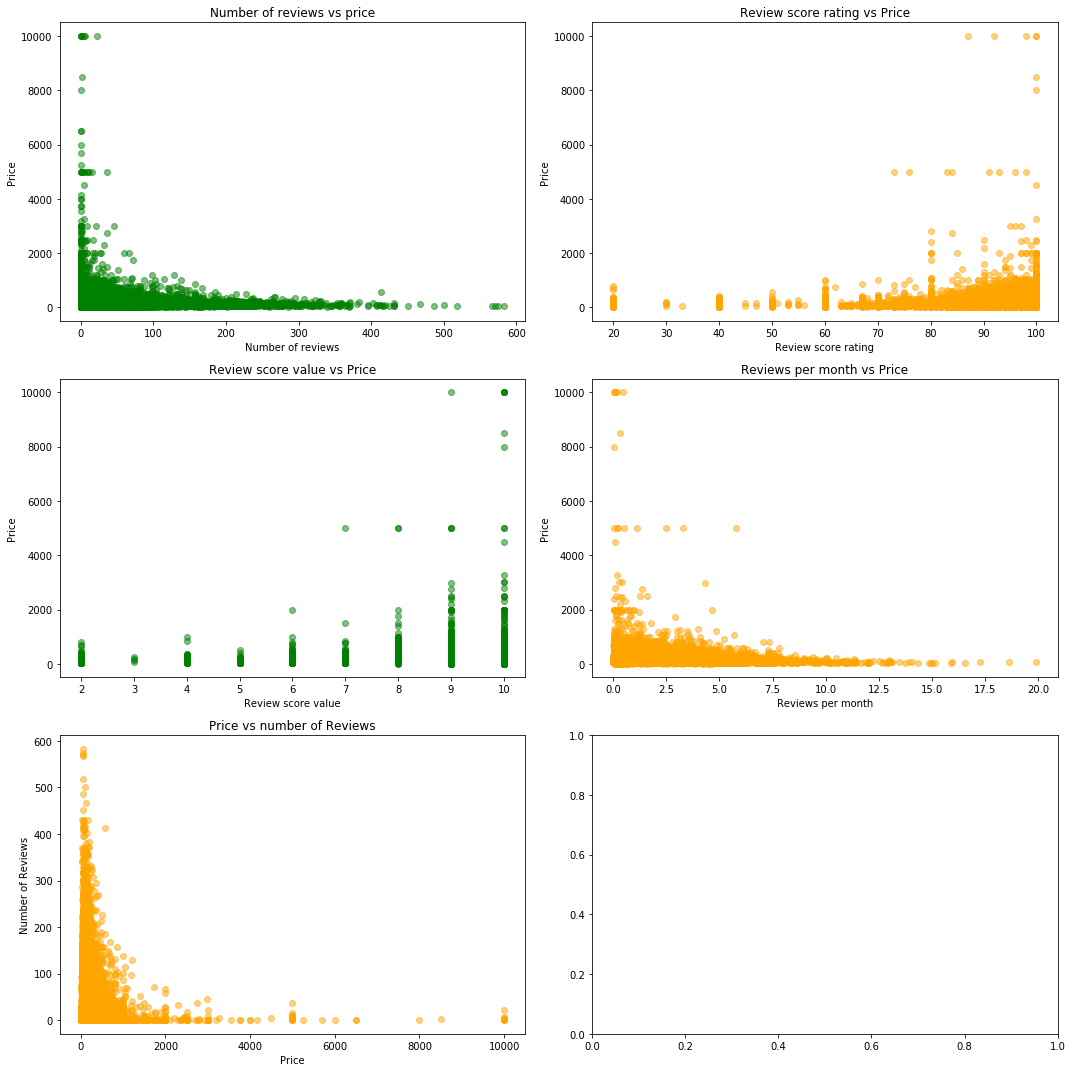

In [89]:
def plot_scatter(x,y, title, x_label, y_label, face, axes):
    
    axes.scatter(x,y,color=face,alpha=0.5)

    
    axes.set_title(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    
    
    
    return axes
    

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 15))
ax1 = plot_scatter(df.number_of_reviews,df.price,
                'Number of reviews vs price', 
                'Number of reviews', 'Price',
                'green', 
                ax1)

ax2 = plot_scatter(df.review_scores_rating,df.price,
                'Review score rating vs Price', 
                'Review score rating', 'Price',
                'orange', 
                ax2)

ax3 = plot_scatter(df.review_scores_value,df.price,
                'Review score value vs Price', 
                'Review score value', 'Price', 
                'green', 
                ax3)

ax4 = plot_scatter(df.reviews_per_month,df.price,
                'Reviews per month vs Price', 
                'Reviews per month', 'Price',
                'orange', 
                ax4)

ax5 = plot_scatter(df.price,df.number_of_reviews,
                'Price vs number of Reviews', 
                'Price','Number of Reviews',
                'orange', ax5)



plt.tight_layout()
plt.show()

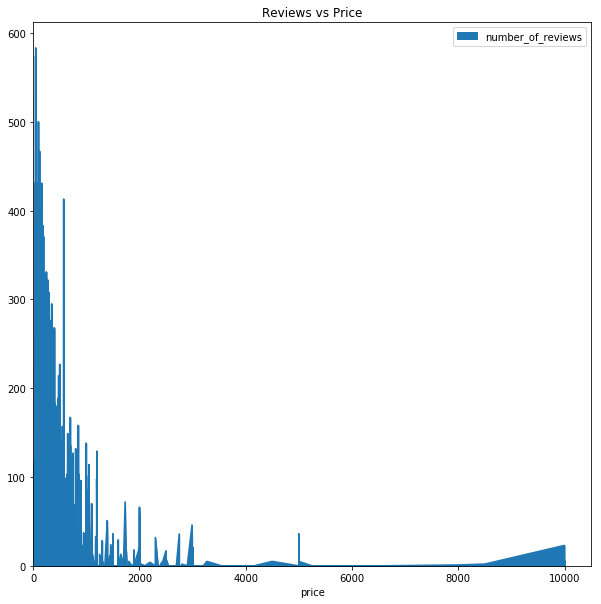

In [90]:
price_review = df[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', y = 'number_of_reviews', figsize =(10,10), kind = 'area', title = 'Reviews vs Price', xlim=0,ylim=0)

In [103]:
df.cancellation_policy.value_counts(0)

strict_14_with_grace_period    22851
flexible                       15565
moderate                       11677
super_strict_60                  123
super_strict_30                    9
strict                             3
Name: cancellation_policy, dtype: int64

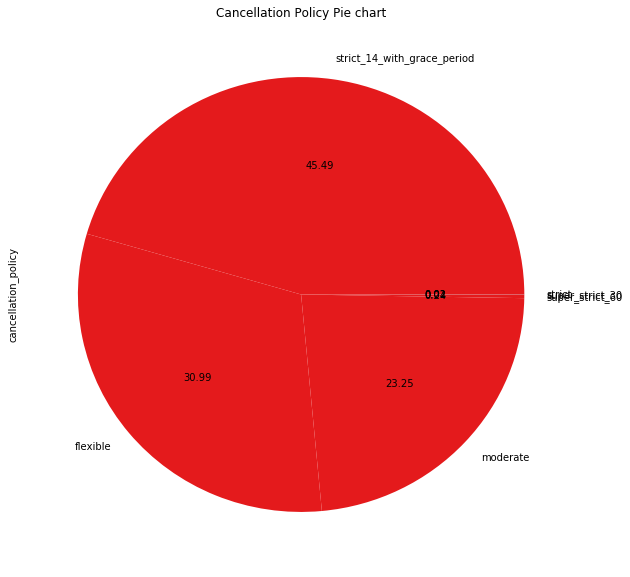

In [108]:
cancel_type = df.cancellation_policy.value_counts(0)

a=np.random.random(40)
cs=cm.Set1(np.arange(40)/40.)
cancel_type.plot.pie(colors=cs,
                   figsize=(10,10), 
                   autopct = '%.2f',
                   title = "Cancellation Policy Pie chart")
